Começamos aqui carregando o csv para analisarmos:

In [2]:
import pandas as pd

file_path = "..\\data\\teste_indicium_precificacao.csv"
df = pd.read_csv(file_path)

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Agora vamos dar uma olhada breve no perfil dos dados e em quais campos nulos podem nos surpreender.

In [9]:
print(f"Nulos: {df.isnull().sum()}")

df.describe()

Nulos: id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Aqui conseguimos entender um pouco mais o comportamento da precificação dos imóveis. Boa parte dos imóveis se concentra na faixa até $200 por noite.
Enquanto uma pequena parte está em $700. Fica claro também que acomodações apt completo são mais caras que as demais e que quartos compartilhados são bem baratos. A maior parte das acomodações também pedem menos que 25 noites mínimas.

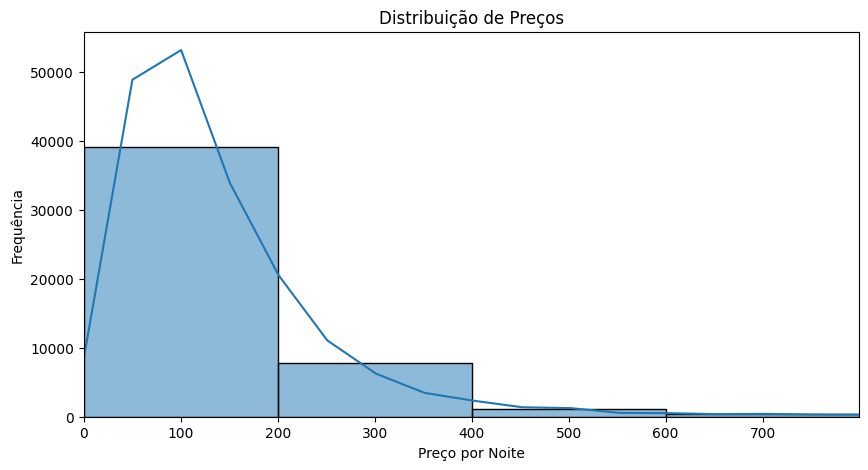

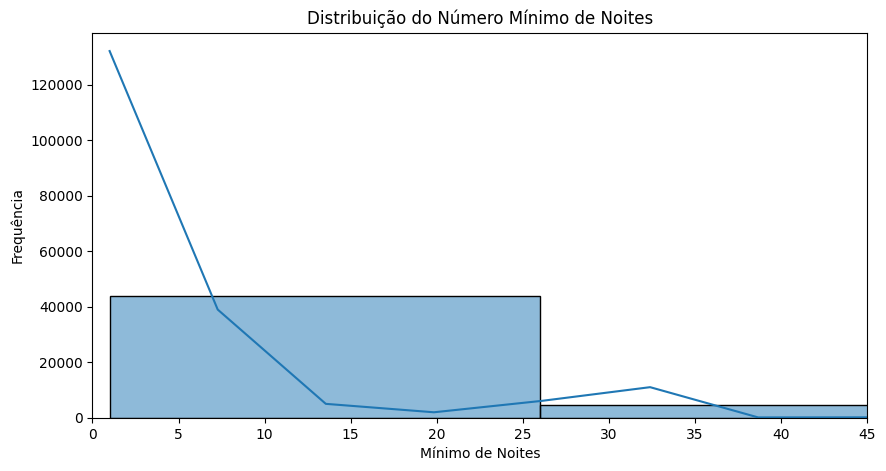

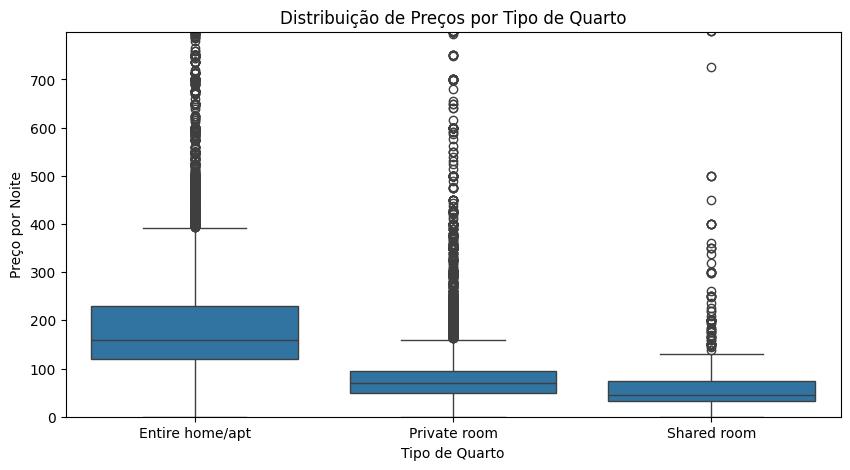

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de preços
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlim(0, df['price'].quantile(0.99))
plt.title('Distribuição de Preços')
plt.xlabel('Preço por Noite')
plt.ylabel('Frequência')
plt.show()

# Distribuição do número de noites mínimas
plt.figure(figsize=(10,5))
sns.histplot(df['minimo_noites'], bins=50, kde=True)
plt.xlim(0, df['minimo_noites'].quantile(0.99))
plt.title('Distribuição do Número Mínimo de Noites')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Frequência')
plt.show()

# Boxplot de preços por tipo de quarto
plt.figure(figsize=(10,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, df['price'].quantile(0.99))
plt.title('Distribuição de Preços por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço por Noite')
plt.show()

Essa análise serve para compreendermos a distribuição dos preços entre os bairro_groups. Manhattan e Brooklyn lideram em preço e em listagens e Staten Island apresenta valor semelhante aos primeiros mas com uma quantidade muito menor disponível de listagens.

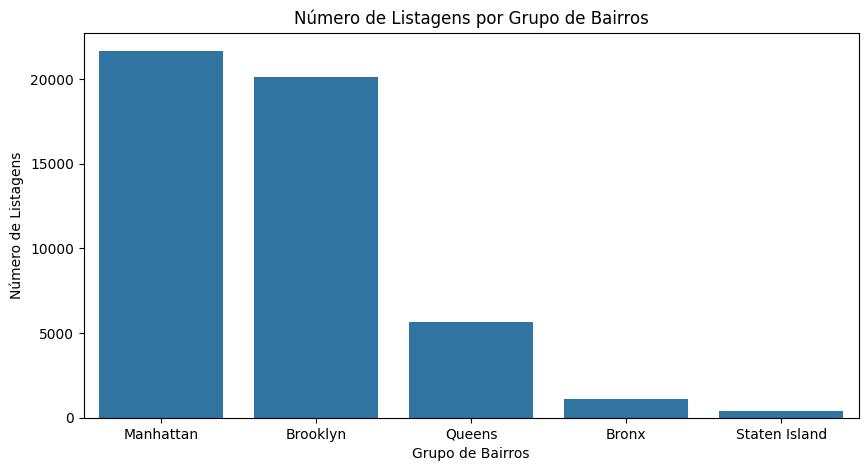

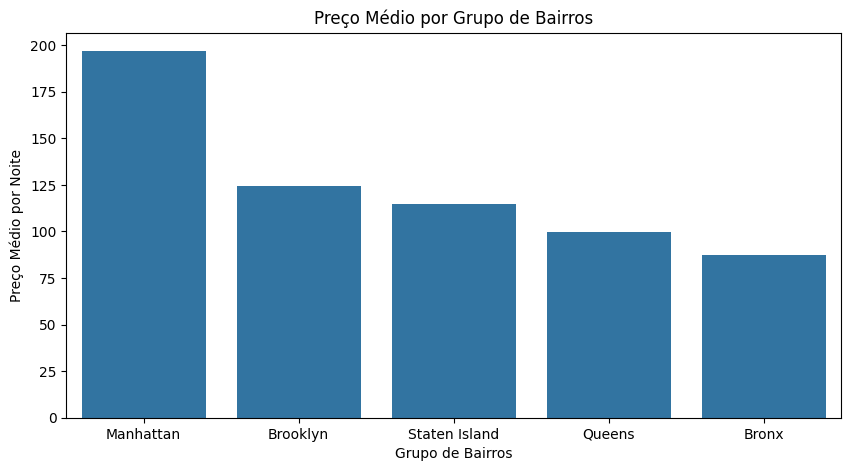

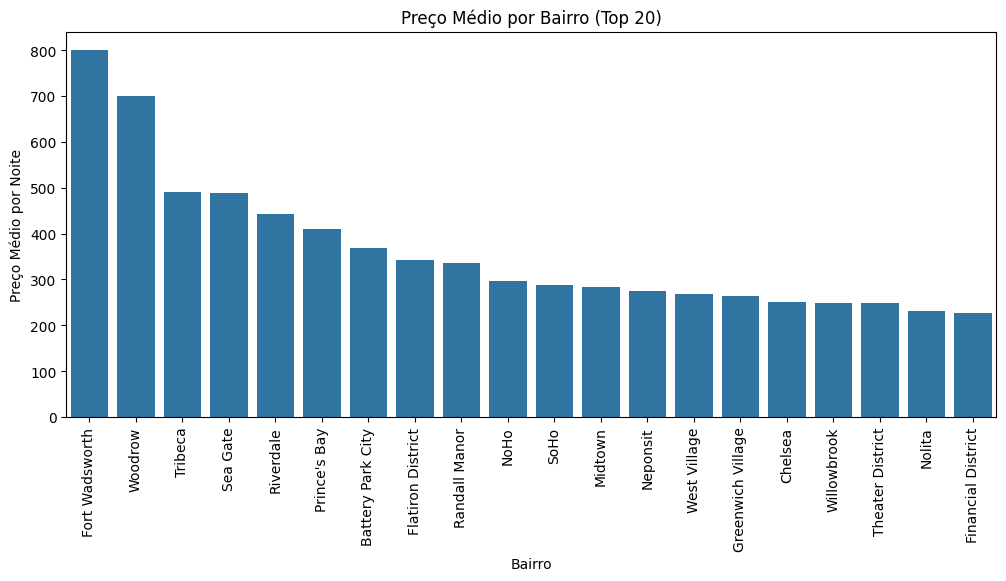

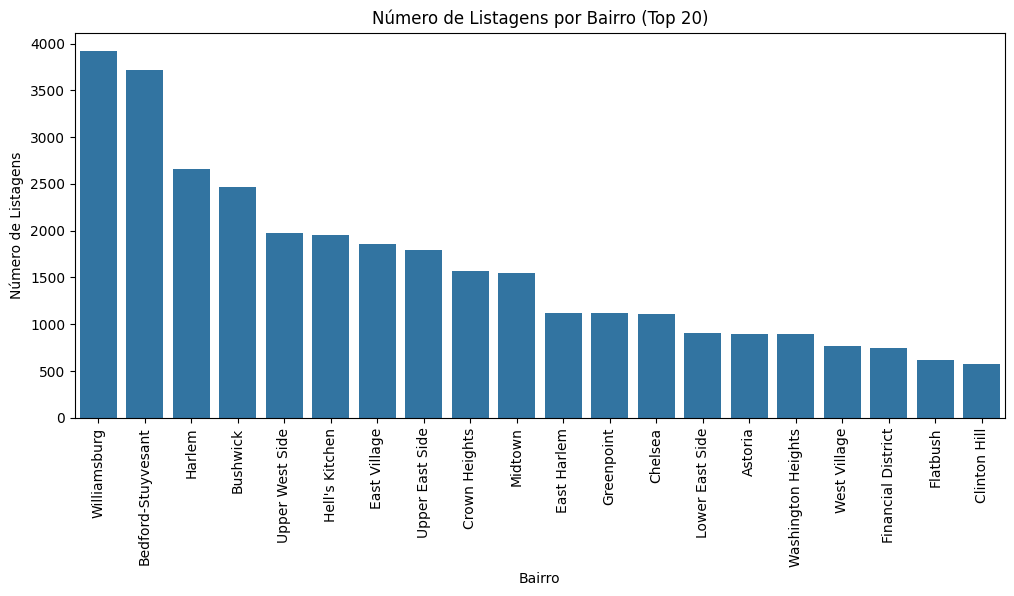

In [12]:
bairro_group_counts = df['bairro_group'].value_counts()

# Preço médio por bairro_group
bairro_group_price_mean = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

# Preço médio por bairro (limite de 20 bairros)
bairro_price_mean = df.groupby('bairro')['price'].mean().sort_values(ascending=False).head(20)

bairro_counts = df['bairro'].value_counts().head(20)

# Gráfico de contagem de listagens por bairro_group
plt.figure(figsize=(10,5))
sns.barplot(x=bairro_group_counts.index, y=bairro_group_counts.values)
plt.title('Número de Listagens por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Número de Listagens')
plt.show()

# Gráfico de preço médio por bairro_group
plt.figure(figsize=(10,5))
sns.barplot(x=bairro_group_price_mean.index, y=bairro_group_price_mean.values)
plt.title('Preço Médio por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço Médio por Noite')
plt.show()

# Gráfico de preço médio por bairro
plt.figure(figsize=(12,5))
sns.barplot(x=bairro_price_mean.index, y=bairro_price_mean.values)
plt.xticks(rotation=90)
plt.title('Preço Médio por Bairro (Top 20)')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio por Noite')
plt.show()

# Gráfico de número de listagens por bairro
plt.figure(figsize=(12,5))
sns.barplot(x=bairro_counts.index, y=bairro_counts.values)
plt.xticks(rotation=90)
plt.title('Número de Listagens por Bairro (Top 20)')
plt.xlabel('Bairro')
plt.ylabel('Número de Listagens')
plt.show()

Com essa série de análises, nos aprofundamos na precificação dos bairro_group. Entemos melhor sua distribuição de preços, a distribuição em seus bairros internos e a variação de preço por tipo de quarto.

Enquanto alguns bairros como Manhattan apresentaram pouca variação entre seus bairros internos, Seagate no Brooklyn mostrou um preço muito superior aos demais bairros internos.

Riverdale no Bronx é um bairro fora do padrão também, custando bem mais caro que os demais. O mesmo vale para Fort Wadsworth e Woodrow em Staten Island.


### Análise para Manhattan ###



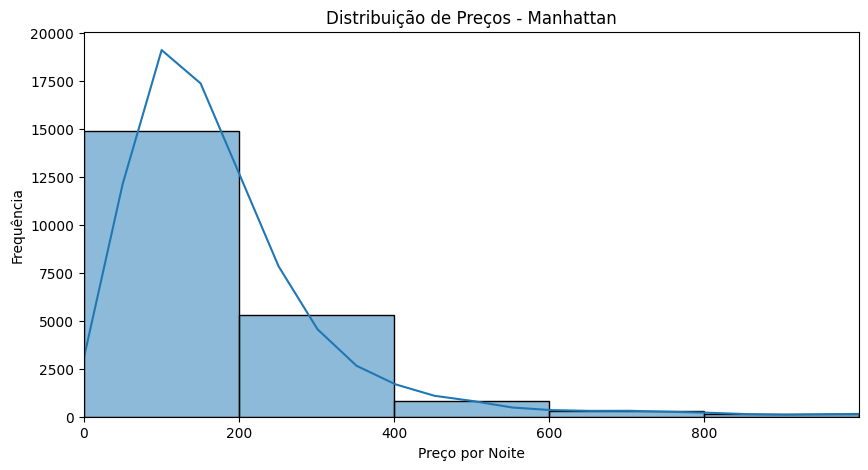

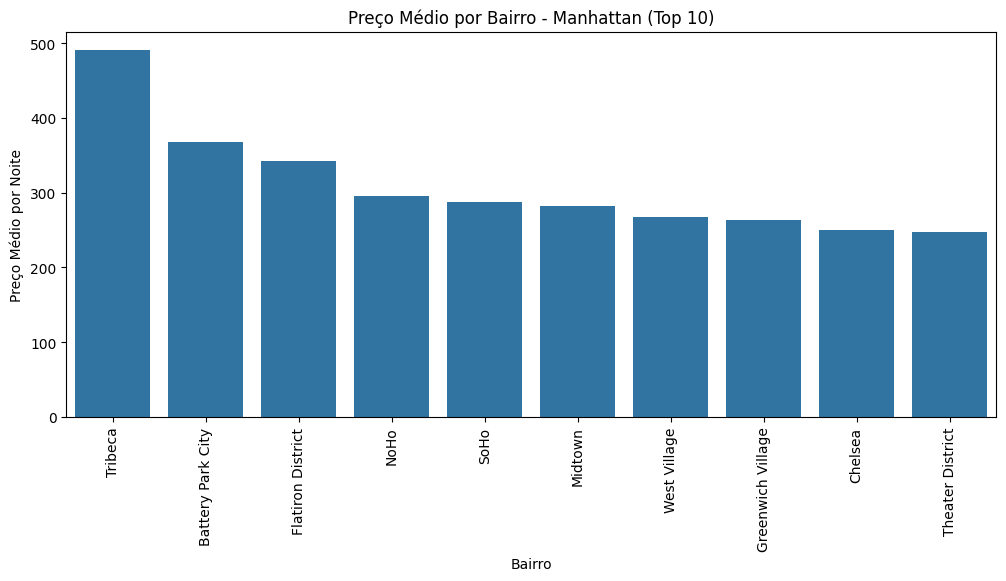

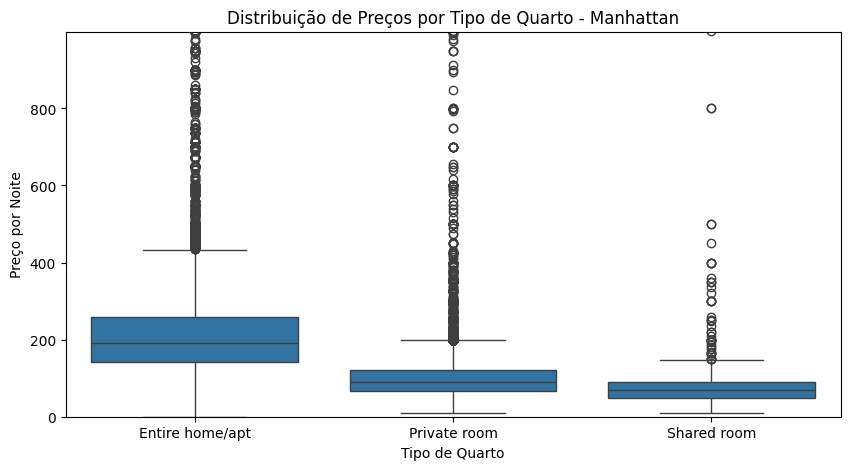


### Análise para Brooklyn ###



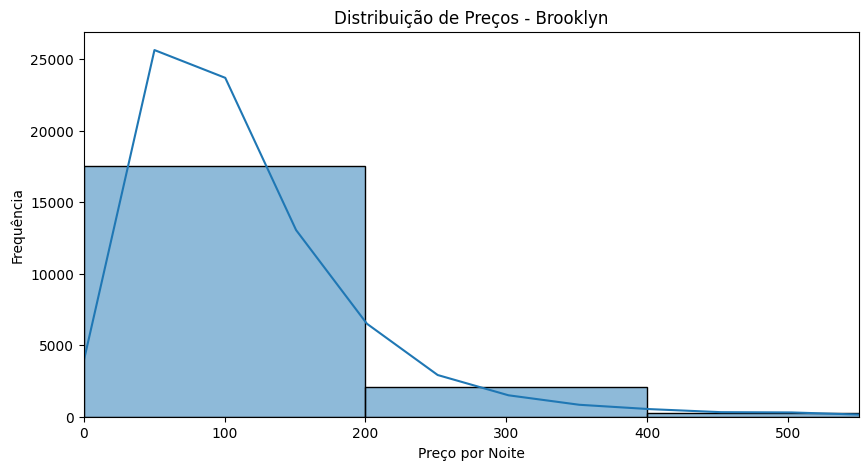

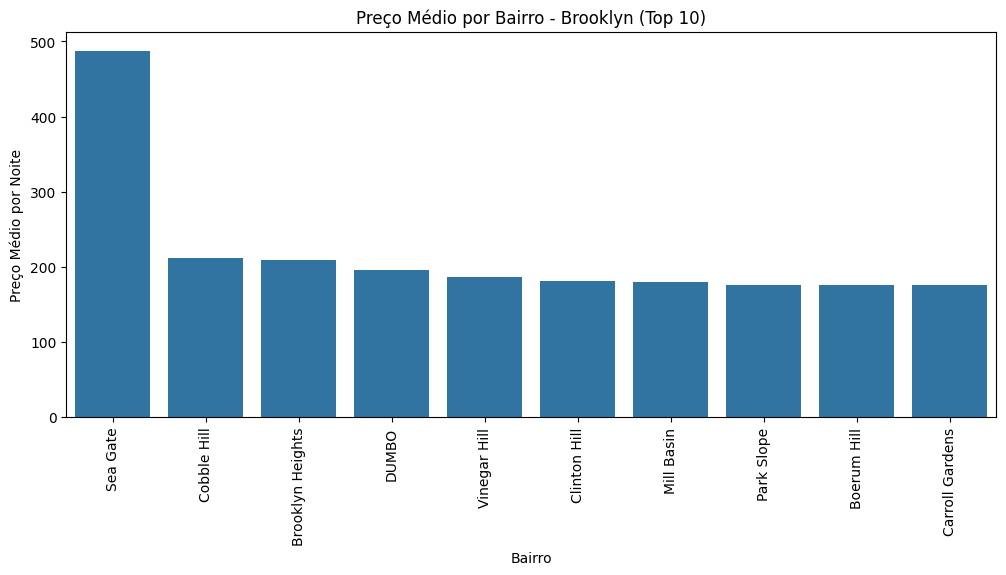

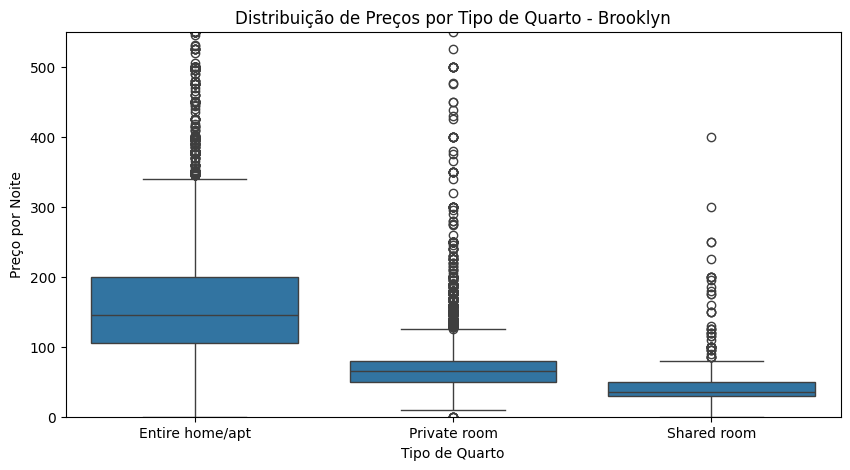


### Análise para Queens ###



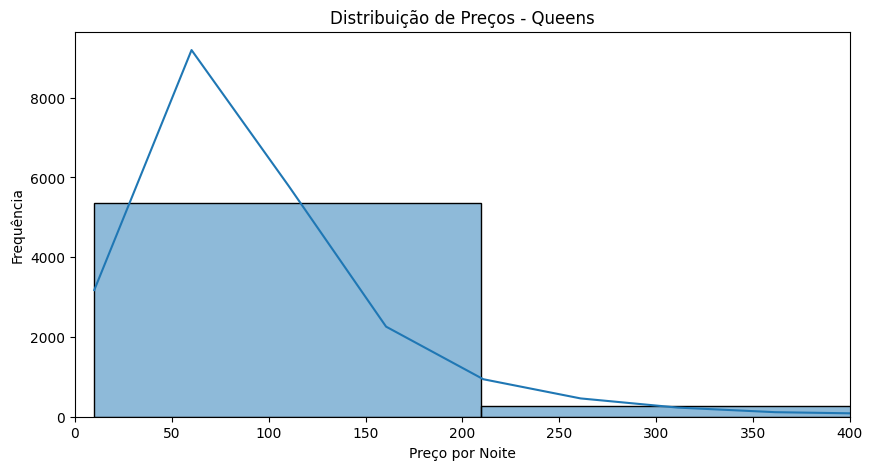

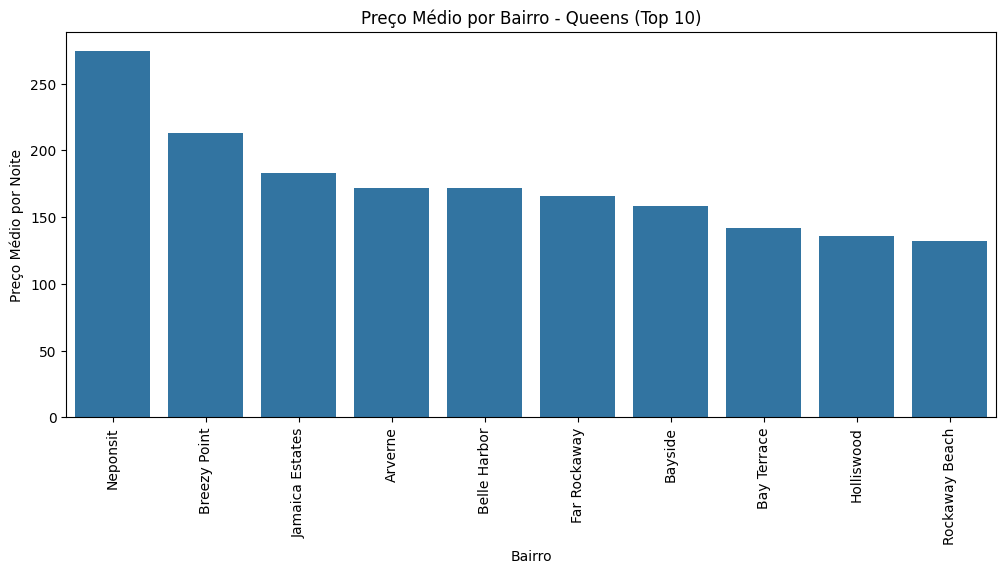

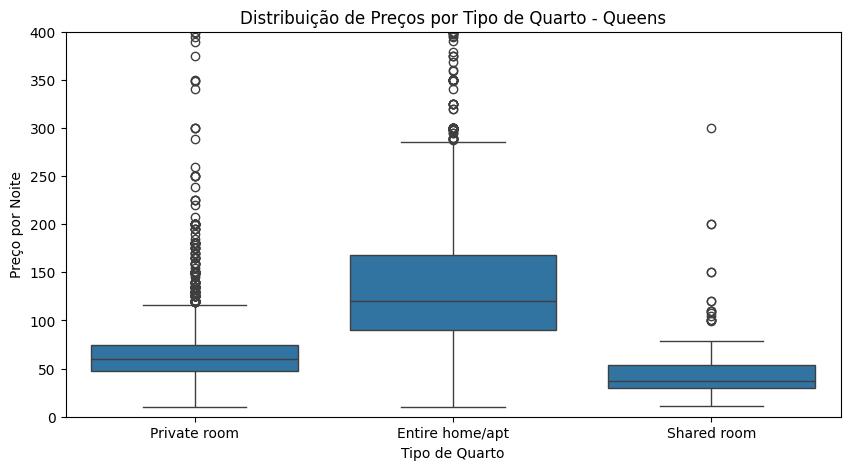


### Análise para Bronx ###



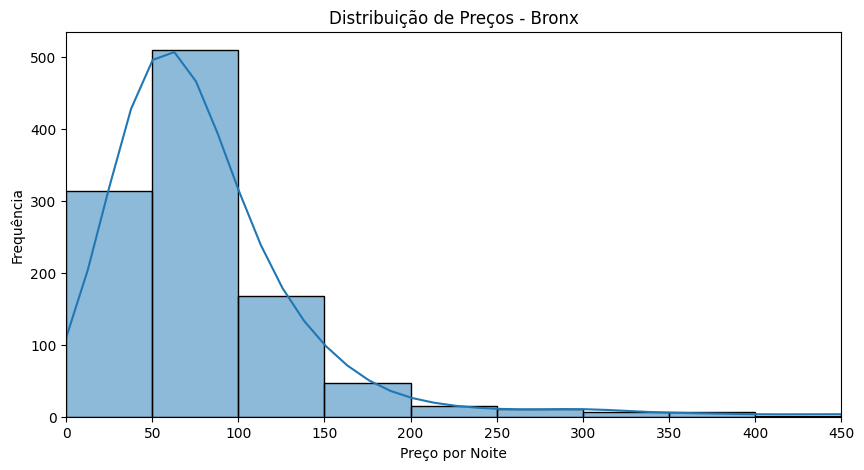

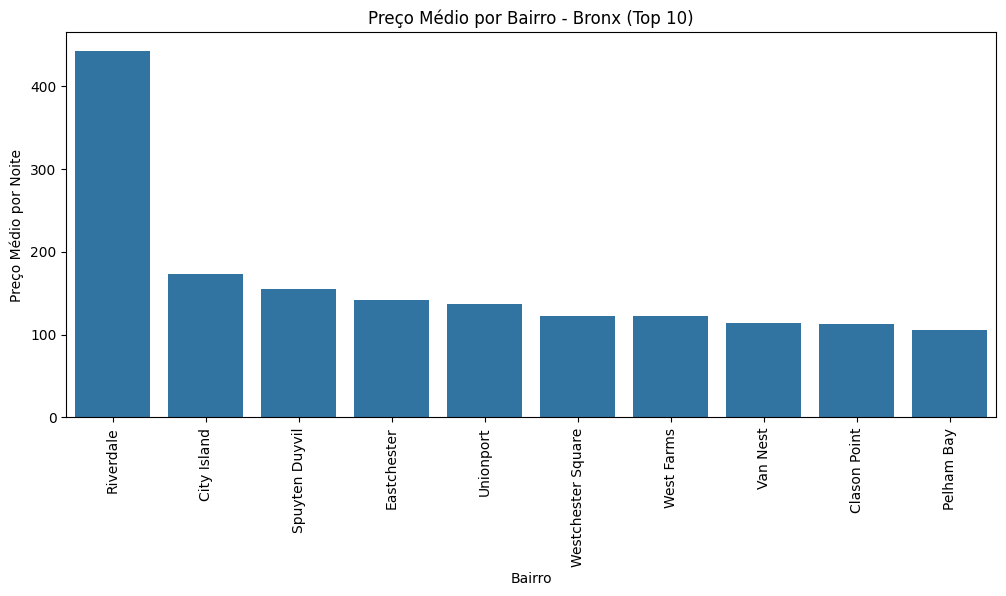

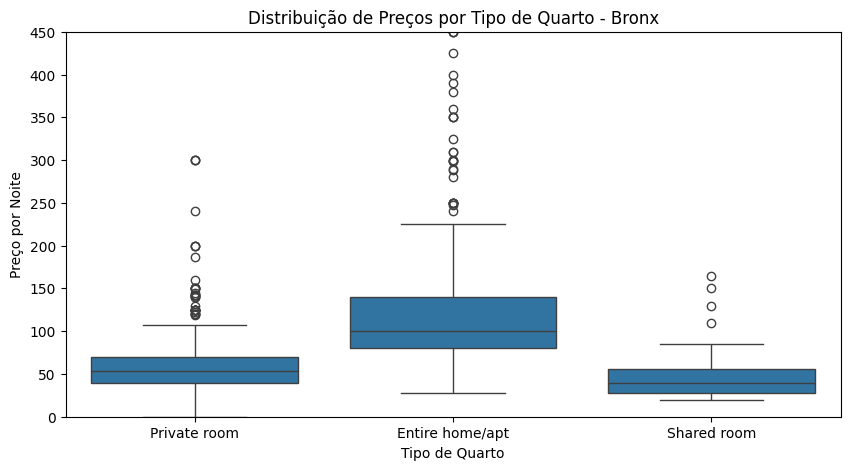


### Análise para Staten Island ###



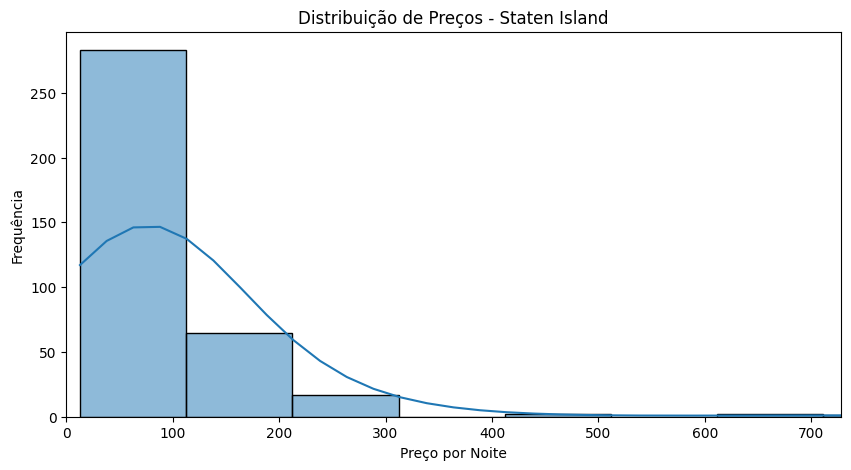

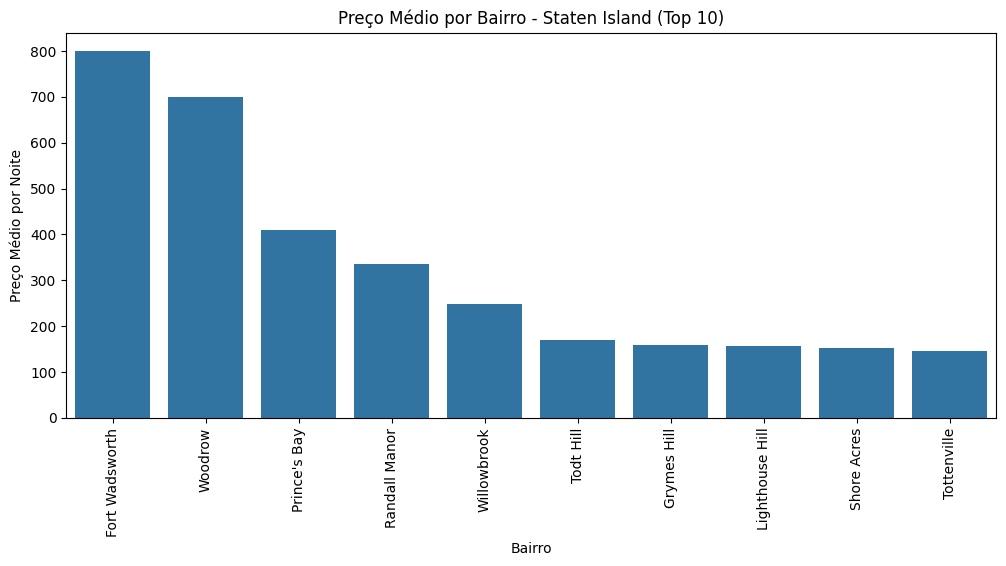

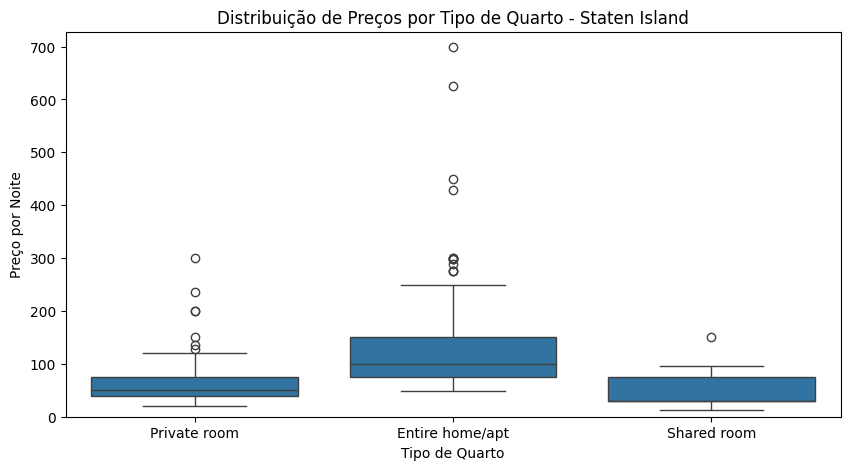

In [13]:
# Filtrando os dados por bairro_group
manhattan_df = df[df['bairro_group'] == 'Manhattan']
brooklyn_df = df[df['bairro_group'] == 'Brooklyn']
queens_df = df[df['bairro_group'] == 'Queens']
bronx_df = df[df['bairro_group'] == 'Bronx']
staten_island_df = df[df['bairro_group'] == 'Staten Island']

def analisar_bairro_group(data, nome):
    print(f"\n### Análise para {nome} ###\n")

    # Distribuição de preços
    plt.figure(figsize=(10,5))
    sns.histplot(data['price'], bins=50, kde=True)
    plt.xlim(0, data['price'].quantile(0.99))
    plt.title(f'Distribuição de Preços - {nome}')
    plt.xlabel('Preço por Noite')
    plt.ylabel('Frequência')
    plt.show()

    # Preço médio por bairro dentro do bairro_group
    top_bairros = data.groupby('bairro')['price'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,5))
    sns.barplot(x=top_bairros.index, y=top_bairros.values)
    plt.xticks(rotation=90)
    plt.title(f'Preço Médio por Bairro - {nome} (Top 10)')
    plt.xlabel('Bairro')
    plt.ylabel('Preço Médio por Noite')
    plt.show()

    # Boxplot de preços por tipo de quarto
    plt.figure(figsize=(10,5))
    sns.boxplot(x='room_type', y='price', data=data)
    plt.ylim(0, data['price'].quantile(0.99))
    plt.title(f'Distribuição de Preços por Tipo de Quarto - {nome}')
    plt.xlabel('Tipo de Quarto')
    plt.ylabel('Preço por Noite')
    plt.show()

# Analisamos aqui cada um dos bairro_group individualmente
analisar_bairro_group(manhattan_df, "Manhattan")
analisar_bairro_group(brooklyn_df, "Brooklyn")
analisar_bairro_group(queens_df, "Queens")
analisar_bairro_group(bronx_df, "Bronx")
analisar_bairro_group(staten_island_df, "Staten Island")


Aqui foi analisada pelo uso do coeficiente de Pearson e o scatterplot a correlação entre o preço e número de Reviews. Ficou claro que a correlação é fraca e negativa. Isso se reflete quando olhamos o scatterplot e vemos uma grande concentração de avaliações em locais baratos. Mas isso provavelmente acontece pois quanto mais barato o apartamento, mais pessoas alugam e mais pessoas podem avaliar.

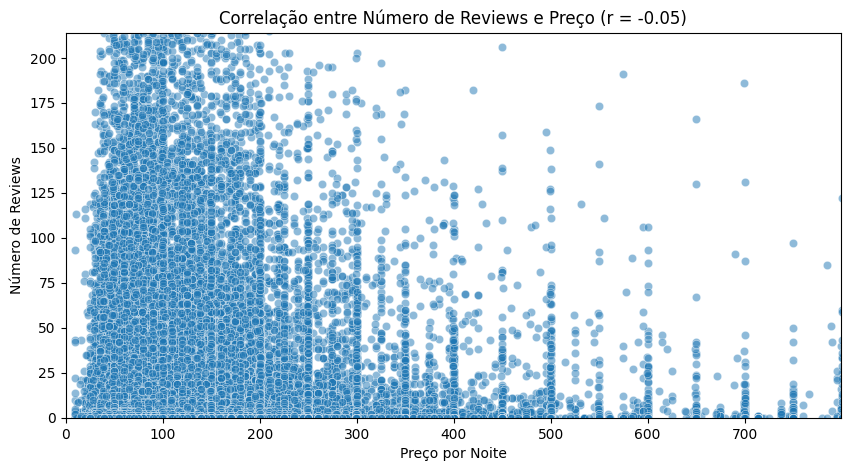

(np.float64(-0.04792581893791471), np.float64(2.917370740984693e-26))

In [14]:
import scipy.stats as stats

df_filtered = df[['price', 'numero_de_reviews']].dropna()
df_filtered = df_filtered[df_filtered['price'] > 0]

correlation, p_value = stats.pearsonr(df_filtered['price'], df_filtered['numero_de_reviews'])

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered['price'], y=df_filtered['numero_de_reviews'], alpha=0.5)
plt.xlim(0, df_filtered['price'].quantile(0.99))
plt.ylim(0, df_filtered['numero_de_reviews'].quantile(0.99))
plt.title(f'Correlação entre Número de Reviews e Preço (r = {correlation:.2f})')
plt.xlabel('Preço por Noite')
plt.ylabel('Número de Reviews')
plt.show()

correlation, p_value


Aqui foi analisada a correlação entre a disponibilidade, o minimo de noites e o preço. Ficou claro com base nos gráficos que a correlação é fraca. Em um exemplo mais adiante calculei o coeficiente de pearson e realmente apontou correlação fraca.

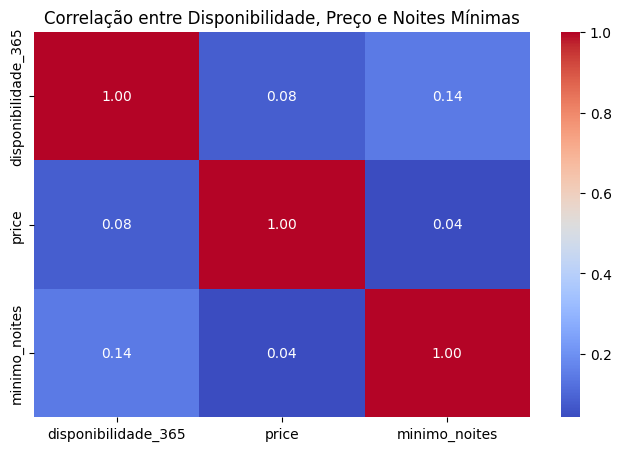

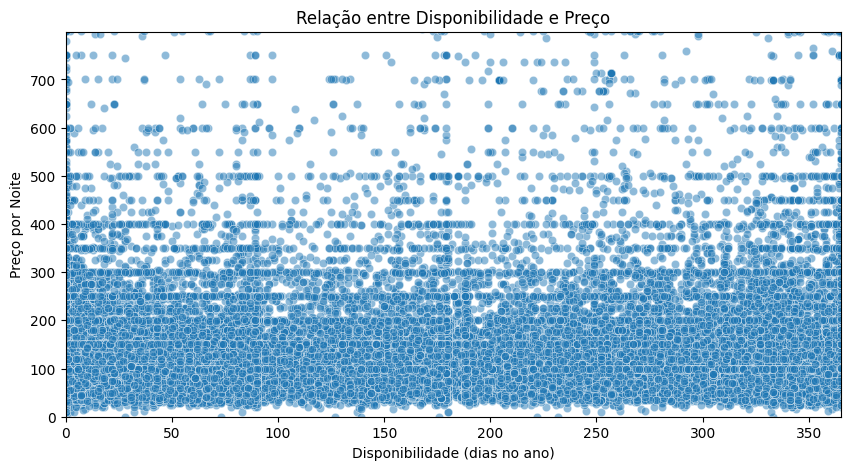

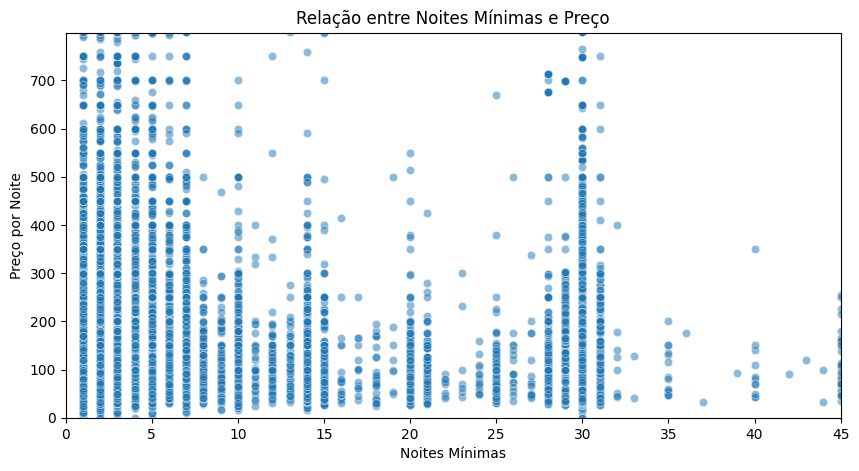

In [15]:
# Correlação entre disponibilidade, preço e noites mínimas
correlation_matrix = df[['disponibilidade_365', 'price', 'minimo_noites']].corr()

# Matriz de correlação
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlação entre Disponibilidade, Preço e Noites Mínimas')
plt.show()

# Relação de disponibilidade e preço
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['disponibilidade_365'], y=df['price'], alpha=0.5)
plt.xlim(0, 365)
plt.ylim(0, df['price'].quantile(0.99))
plt.title('Relação entre Disponibilidade e Preço')
plt.xlabel('Disponibilidade (dias no ano)')
plt.ylabel('Preço por Noite')
plt.show()

# Relação de noites mínimas e preço
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['minimo_noites'], y=df['price'], alpha=0.5)
plt.xlim(0, df['minimo_noites'].quantile(0.99))
plt.ylim(0, df['price'].quantile(0.99))
plt.title('Relação entre Noites Mínimas e Preço')
plt.xlabel('Noites Mínimas')
plt.ylabel('Preço por Noite')
plt.show()


Aqui foi analisada a correlação entre o preço médio e o tipo de imóvel. Ficou claro que quanto mais privativo mais caro. Sendo o quarto compartilhado a opção mais barata em média e o apt completo o mais caro.

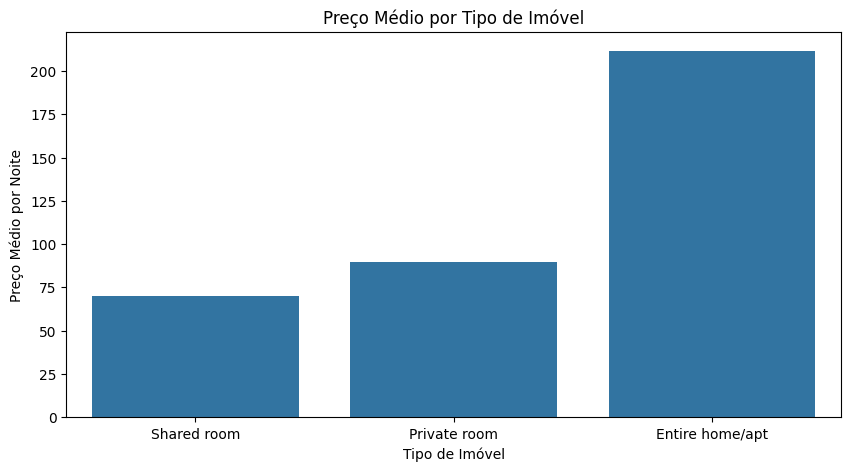

(np.float64(-0.24935139551217977), np.float64(0.0))

In [16]:
# Calculamos o preço médio por tipo de quarto
preco_por_tipo = df.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=preco_por_tipo.index, y=preco_por_tipo.values)
plt.title('Preço Médio por Tipo de Imóvel')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Preço Médio por Noite')
plt.show()

df_encoded = df.copy()
df_encoded['room_type'] = df_encoded['room_type'].astype('category').cat.codes

correlation_tipo_preco, p_value_tipo_preco = stats.pearsonr(df_encoded['room_type'], df_encoded['price'])

correlation_tipo_preco, p_value_tipo_preco


Aqui foram feitas algumas análises para entender a correlação entre a localização e os preços. Isso foi interessante pois nos revelou que a longitude por si só tem uma boa correlação com o preço. Quanto mais próximo do centro mais caro, isso se confirma quando olhamos para o heatmap e vemos manhattan bem ao centro com valores altos.

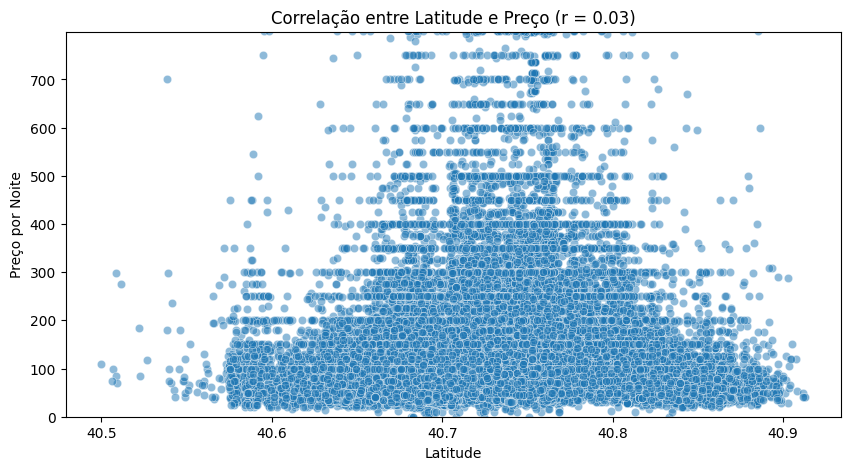

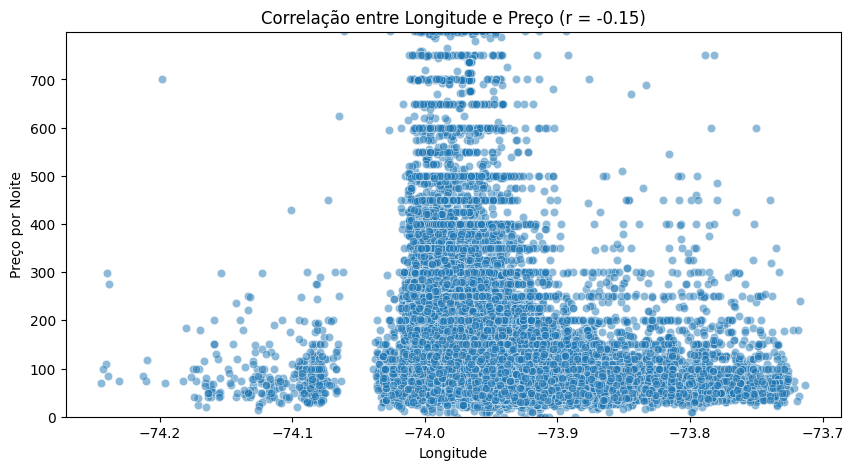

(np.float64(0.033938969477173224),
 np.float64(6.070538362976502e-14),
 np.float64(-0.15001970286320207),
 np.float64(5.1409802213711394e-244))

In [17]:
df_location = df[['latitude', 'longitude', 'price']].dropna()

# Calculamos a correlação entre latitude/longitude e preço
correlation_latitude, p_value_latitude = stats.pearsonr(df_location['latitude'], df_location['price'])
correlation_longitude, p_value_longitude = stats.pearsonr(df_location['longitude'], df_location['price'])

# Scatter da Latitude vs. Preço
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_location['latitude'], y=df_location['price'], alpha=0.5)
plt.ylim(0, df_location['price'].quantile(0.99))
plt.title(f'Correlação entre Latitude e Preço (r = {correlation_latitude:.2f})')
plt.xlabel('Latitude')
plt.ylabel('Preço por Noite')
plt.show()

# Scatter da Longitude vs. Preço
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_location['longitude'], y=df_location['price'], alpha=0.5)
plt.ylim(0, df_location['price'].quantile(0.99))
plt.title(f'Correlação entre Longitude e Preço (r = {correlation_longitude:.2f})')
plt.xlabel('Longitude')
plt.ylabel('Preço por Noite')
plt.show()

correlation_latitude, p_value_latitude, correlation_longitude, p_value_longitude


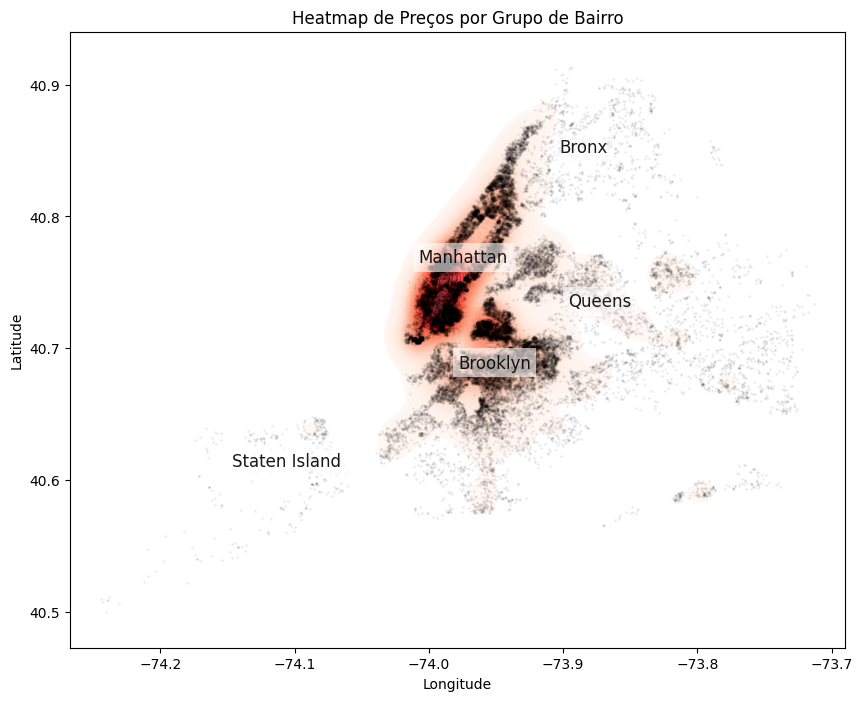

In [18]:
# Aqui calculamos posição média de cada grupo de bairro
bairros_group_centrais = df.groupby('bairro_group')[['latitude', 'longitude']].mean()

# Criamos um heatmap
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df['longitude'],
    y=df['latitude'],
    weights=df['price'],
    cmap="Reds",
    fill=True,
    levels=50,
    alpha=0.8
)
plt.scatter(df['longitude'], df['latitude'], alpha=0.05, color='black', s=1)

# Adicionamos nomes ao heatmap
for bairro_group, (lat, lon) in bairros_group_centrais.iterrows():
    plt.text(lon, lat, bairro_group, fontsize=12, color='black', ha='center',
             alpha=0.9, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap de Preços por Grupo de Bairro")
plt.show()


Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Essa pessoa deveria investir em Staten Island, pois possui ótimos preços, pouca concorrência e o maior retorno estimado.

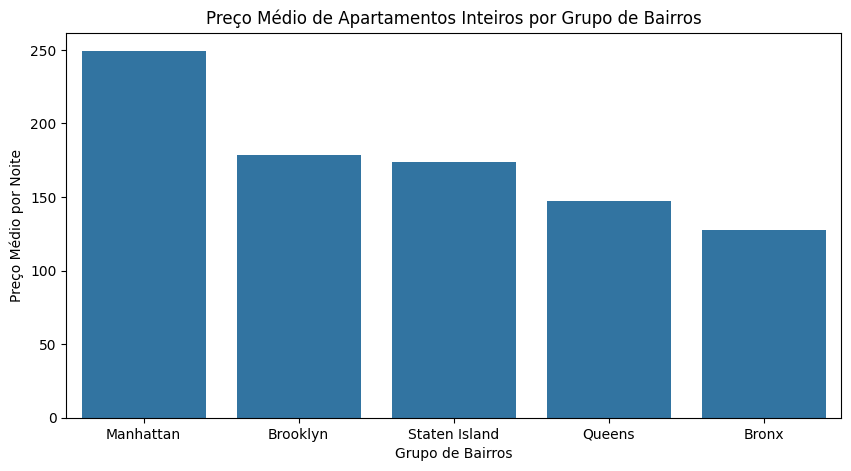

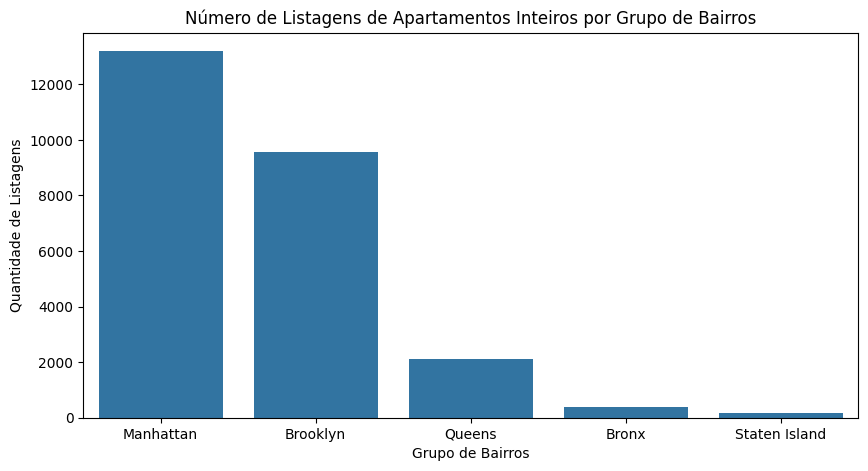

bairro_group
Staten Island    30957.534123
Manhattan        29196.117356
Bronx            20146.042216
Queens           19449.963893
Brooklyn         17334.355196
dtype: float64


C:\Users\mapadata\AppData\Local\Temp\ipykernel_24096\1924642248.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  retorno_estimado = df_apartamentos.groupby('bairro_group').apply(


In [19]:
# Filtramos apenas por apartamentos inteiros
df_apartamentos = df[df['room_type'] == 'Entire home/apt']

preco_medio_bairro_group = df_apartamentos.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

listagens_por_bairro_group = df_apartamentos['bairro_group'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=preco_medio_bairro_group.index, y=preco_medio_bairro_group.values)
plt.title('Preço Médio de Apartamentos Inteiros por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço Médio por Noite')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=listagens_por_bairro_group.index, y=listagens_por_bairro_group.values)
plt.title('Número de Listagens de Apartamentos Inteiros por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Quantidade de Listagens')
plt.show()

# Calculamos aqui o retorno estimado (preço médio * disponibilidade média)
retorno_estimado = df_apartamentos.groupby('bairro_group').apply(
    lambda x: x['price'].mean() * x['disponibilidade_365'].mean()
).sort_values(ascending=False)

print(retorno_estimado)

O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Não. Conforme podemos ver nos gráficos, a relação entre os valores é bem fraca. Além disso podemos ver pelo Coeficiente de correlação de Pearson que as relações são muito fracas.

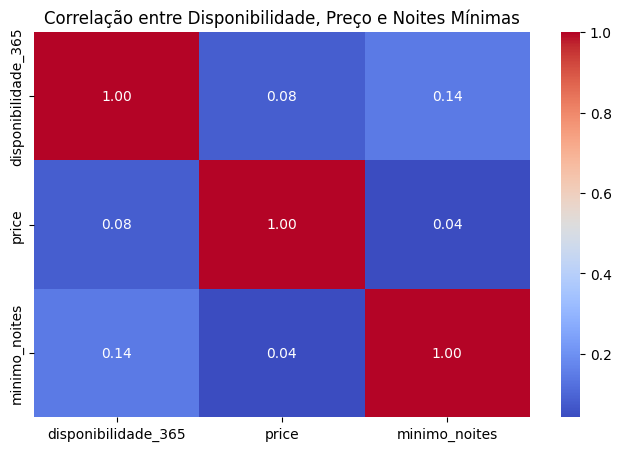

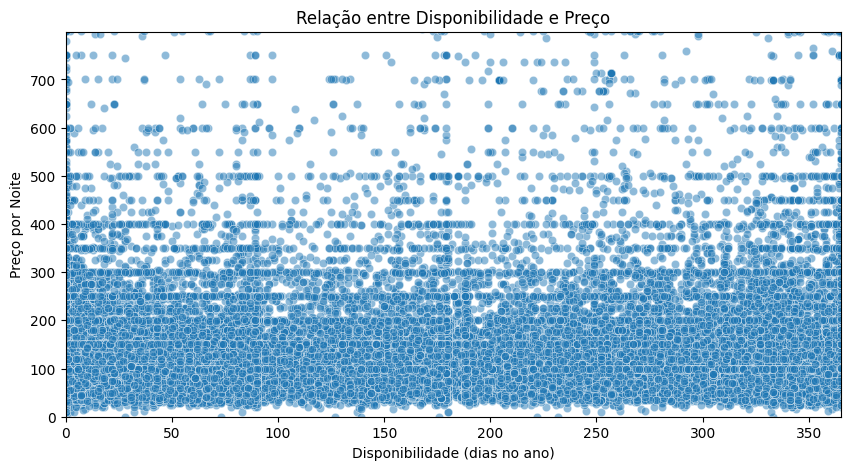

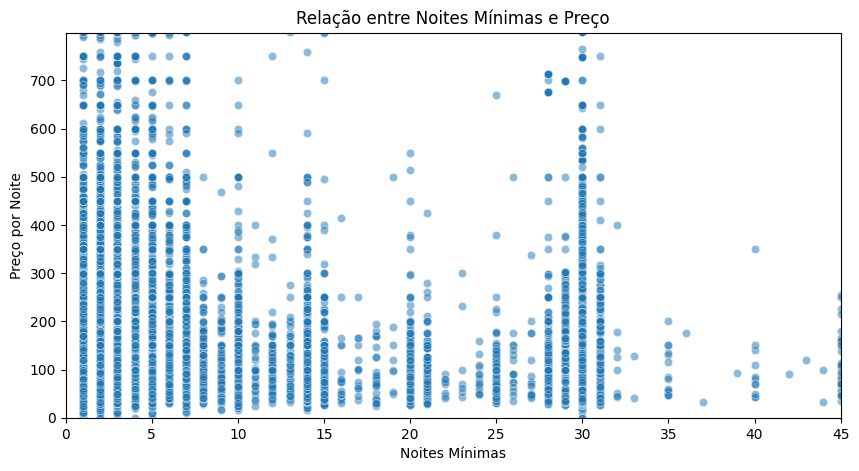

In [20]:
# Correlação entre disponibilidade, preço e noites mínimas
correlation_matrix = df[['disponibilidade_365', 'price', 'minimo_noites']].corr()

# Matriz de correlação
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlação entre Disponibilidade, Preço e Noites Mínimas')
plt.show()

# Relação de disponibilidade e preço
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['disponibilidade_365'], y=df['price'], alpha=0.5)
plt.xlim(0, 365)
plt.ylim(0, df['price'].quantile(0.99))
plt.title('Relação entre Disponibilidade e Preço')
plt.xlabel('Disponibilidade (dias no ano)')
plt.ylabel('Preço por Noite')
plt.show()

# Relação de noites mínimas e preço
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['minimo_noites'], y=df['price'], alpha=0.5)
plt.xlim(0, df['minimo_noites'].quantile(0.99))
plt.ylim(0, df['price'].quantile(0.99))
plt.title('Relação entre Noites Mínimas e Preço')
plt.xlabel('Noites Mínimas')
plt.ylabel('Preço por Noite')
plt.show()


In [18]:
# Coeficiente de correlação de Pearson
correlacao_disponibilidade_preco = df["disponibilidade_365"].corr(df["price"])
correlacao_minimo_noites_preco = df["minimo_noites"].corr(df["price"])

correlacao_disponibilidade_preco, correlacao_minimo_noites_preco

(0.08183250775771085, 0.04279927891945843)

Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Sim. Parece que acomodações mais caras costumam ter nomes que enfatizam:


*   Marcas e redes
*   Localizações
*   Serviços
*   Infraestrutura

Isso foi descoberto usando ngrams e dividindo o dataframe entre 3 categorias de preço: baixo, médio e alto.




In [21]:
from itertools import islice
from collections import Counter
import re

#Dividimos nosso dataframe em várias faixas de preço

df["faixa_preco"] = pd.qcut(df["price"], q=3, labels=["baixo", "médio", "alto"])

# Extraimos sequências de múltiplas palavras ngrams
def gerar_ngrams(texto, n=2):
    palavras = re.findall(r'\b\w+\b', texto.lower())
    return [" ".join(palavras[i:i+n]) for i in range(len(palavras)-n+1)]

def processar_ngrams(lista_nomes, n=2):
    ngram_counter = Counter()
    for nome in lista_nomes:
        ngram_counter.update(gerar_ngrams(str(nome), n))
    return ngram_counter

bigrams_alto = processar_ngrams(df[df["faixa_preco"] == "alto"]["nome"], n=2)
trigrams_alto = processar_ngrams(df[df["faixa_preco"] == "alto"]["nome"], n=3)

bigrams_medio = processar_ngrams(df[df["faixa_preco"] == "médio"]["nome"], n=2)
trigrams_medio = processar_ngrams(df[df["faixa_preco"] == "médio"]["nome"], n=3)

bigrams_baixo = processar_ngrams(df[df["faixa_preco"] == "baixo"]["nome"], n=2)
trigrams_baixo = processar_ngrams(df[df["faixa_preco"] == "baixo"]["nome"], n=3)

# Identificamos bigramas e trigramas exclusivos do grupo "alto"
bigrams_exclusivos_alto = set(bigrams_alto.keys()) - (set(bigrams_medio.keys()) | set(bigrams_baixo.keys()))
trigrams_exclusivos_alto = set(trigrams_alto.keys()) - (set(trigrams_medio.keys()) | set(trigrams_baixo.keys()))

# Selecionamos os mais frequentes
bigrams_exclusivos_alto_sorted = sorted(
    ((bigram, bigrams_alto[bigram]) for bigram in bigrams_exclusivos_alto), key=lambda x: x[1], reverse=True
)[:20]

trigrams_exclusivos_alto_sorted = sorted(
    ((trigram, trigrams_alto[trigram]) for trigram in trigrams_exclusivos_alto), key=lambda x: x[1], reverse=True
)[:20]

# Formatamos em dataframes
df_bigrams_exclusivos = pd.DataFrame(bigrams_exclusivos_alto_sorted, columns=["Bigram", "Frequência"])
df_trigrams_exclusivos = pd.DataFrame(trigrams_exclusivos_alto_sorted, columns=["Trigram", "Frequência"])

print(df_bigrams_exclusivos)
print(df_trigrams_exclusivos)

            Bigram  Frequência
0    by blueground         229
1   stock exchange         158
2     sonder stock         158
3      service fee          49
4         no guest          49
5    guest service          49
6        by sonder          45
7         the nash          43
8      fee beekman          34
9    beekman tower          34
10    sutton place          29
11       box house          28
12        w indoor          27
13    1bd serviced          26
14     house hotel          25
15      street lux          23
16      21 chelsea          23
17       sonder 21          23
18     1br laundry          22
19       180 water          22
                  Trigram  Frequência
0   sonder stock exchange         158
1   doorman by blueground          61
2        no guest service          49
3       guest service fee          49
4       gym by blueground          46
5         sonder the nash          43
6           w gym doorman          39
7          gym doorman by          35
8      